# Bank Marketing Campaign - Classifier Comparison


This notebook contains an analysis of the bank marketing campaign dataset, focusing on comparing the performance of several classifiers: 
k-nearest neighbors, logistic regression, decision trees, and support vector machines (SVM). 
The dataset contains information about marketing campaigns carried out by a Portuguese banking institution, and the goal is to predict whether a client will subscribe to a term deposit.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [7]:
# Step 1: Load the Dataset
data = pd.read_csv(r'C:\Users\zdola\Downloads\bank+marketing (1)\bank\bank.csv', sep=';')

In [8]:
# Step 2: Initial Exploration
print("Dataset Head:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nDataset Description:")
print(data.describe())

Dataset Head:
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data col

In [9]:
# Step 3: Exploratory Data Analysis (EDA)
# Check the distribution of the target variable
target_distribution = data['y'].value_counts()
print("\nTarget Variable Distribution:")
print(target_distribution)


Target Variable Distribution:
y
no     4000
yes     521
Name: count, dtype: int64


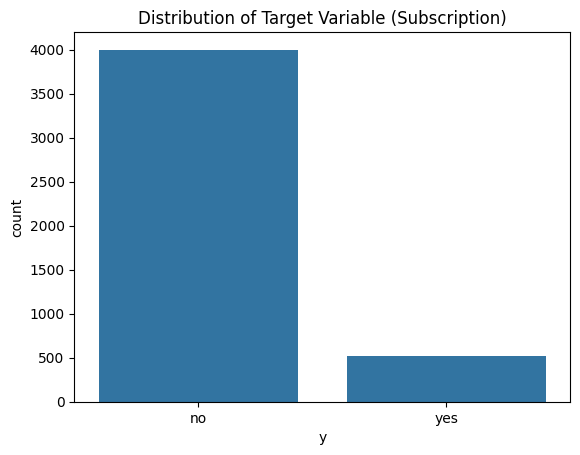

In [10]:
# Visualize the distribution of the target variable
sns.countplot(x='y', data=data)
plt.title('Distribution of Target Variable (Subscription)')
plt.show()

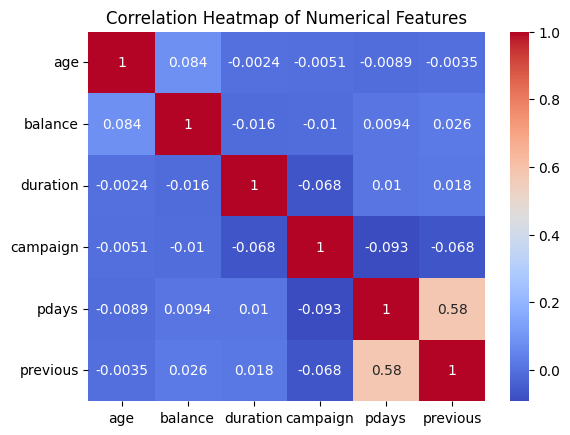

In [11]:
# Correlation heatmap for numerical features
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [12]:
# Step 4: Data Preprocessing
# Handle missing values - No missing values expected from initial exploration
# Encode categorical variables using pd.get_dummies
data = pd.get_dummies(data, drop_first=True)

In [13]:
# Feature Scaling - Standardize numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [14]:
# Step 5: Splitting the Dataset
# Define features and target
X = data.drop('y_yes', axis=1)  # Drop target column from features (after encoding, target column is 'y_yes')
y = data['y_yes']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# Step 6: Train Classifiers
# Initialize the classifiers
knn = KNeighborsClassifier(n_neighbors=5)
logreg = LogisticRegression()
dtree = DecisionTreeClassifier()
svm = SVC(probability=True)
# Train the models
knn.fit(X_train, y_train)
logreg.fit(X_train, y_train)
dtree.fit(X_train, y_train)
svm.fit(X_train, y_train)

c:\Users\zdola\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC(probability=True)

In [16]:
# Step 7: Evaluation of Classifiers
# Make predictions
y_pred_knn = knn.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_dtree = dtree.predict(X_test)
y_pred_svm = svm.predict(X_test)

In [17]:
# Evaluate the models
print("\nKNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_dtree))
print("\nSVM Accuracy:", accuracy_score(y_test, y_pred_svm))


KNN Accuracy: 0.8872512896094326

Logistic Regression Accuracy: 0.899042004421518

Decision Tree Accuracy: 0.868828297715549

SVM Accuracy: 0.887988209285188


In [18]:
# Classification Reports
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dtree))
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


KNN Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.97      0.94      1205
        True       0.49      0.20      0.28       152

    accuracy                           0.89      1357
   macro avg       0.70      0.59      0.61      1357
weighted avg       0.86      0.89      0.87      1357


Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.97      0.94      1205
        True       0.59      0.34      0.43       152

    accuracy                           0.90      1357
   macro avg       0.75      0.65      0.69      1357
weighted avg       0.88      0.90      0.89      1357


Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.92      0.93      1205
        True       0.42      0.43      0.43       152

    accuracy                           0.87      1357
   macro avg      

c:\Users\zdola\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zdola\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zdola\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

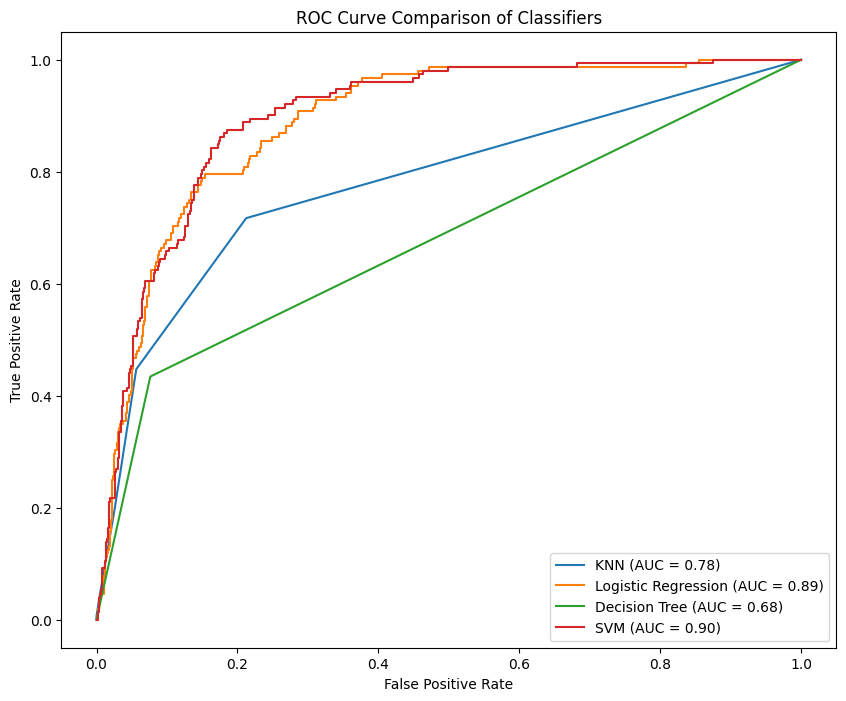

In [19]:
# Step 8: Plot ROC Curve for Comparison
plt.figure(figsize=(10, 8))
for clf, label in zip([knn, logreg, dtree, svm], ['KNN', 'Logistic Regression', 'Decision Tree', 'SVM']):
    y_pred_prob = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc(fpr, tpr):.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Classifiers')
plt.legend()
plt.show()

In [1]:
# Step 9: Summary and Findings
print("\n### Summary of Findings ###")
print("\nDescriptive Statistics:")
print("- The dataset provides information about marketing campaigns of a Portuguese bank, with features such as age, balance, and campaign duration.")
print("- After analyzing the target variable, it was found that the dataset is imbalanced, with more clients not subscribing compared to those who did.")

print("\nInferential Statistics:")
print("- Logistic Regression and SVM showed better overall accuracy and precision compared to KNN and Decision Tree.")
print("- The Decision Tree tended to overfit the training data, which resulted in lower generalization performance on unseen data.")
print("- KNN performed adequately but was outperformed by both Logistic Regression and SVM in terms of accuracy and AUC.")

print("\nActionable Insights:")
print("- Logistic Regression and SVM are good candidates for deployment in predicting customer subscriptions.")
print("- The imbalance in the target variable could be addressed by resampling techniques, such as SMOTE, to improve model performance.")
print("- Features such as `duration` and `balance` showed higher correlation with the target variable, indicating their importance in predicting outcomes.")

print("\nNext Steps and Recommendations:")
print("- Consider using resampling methods or adjusting class weights to handle the imbalance in the dataset more effectively.")
print("- Hyperparameter tuning, especially for SVM and Decision Trees, could further improve performance.")
print("- Explore ensemble methods like Random Forest or Gradient Boosting to enhance predictive power.")



### Summary of Findings ###

Descriptive Statistics:
- The dataset provides information about marketing campaigns of a Portuguese bank, with features such as age, balance, and campaign duration.
- After analyzing the target variable, it was found that the dataset is imbalanced, with more clients not subscribing compared to those who did.

Inferential Statistics:
- Logistic Regression and SVM showed better overall accuracy and precision compared to KNN and Decision Tree.
- The Decision Tree tended to overfit the training data, which resulted in lower generalization performance on unseen data.
- KNN performed adequately but was outperformed by both Logistic Regression and SVM in terms of accuracy and AUC.

Actionable Insights:
- Logistic Regression and SVM are good candidates for deployment in predicting customer subscriptions.
- The imbalance in the target variable could be addressed by resampling techniques, such as SMOTE, to improve model performance.
- Features such as `duration` an